In [1]:
import numpy as np
from sklearn.cluster import DBSCAN

from mapper.cover import CoverGraph
from mapper.search import BallSearch
from mapper.pipeline import MapperPipeline
from mapper.plot import MapperPlot

import matplotlib.pyplot as plt


mp = MapperPipeline(
    search_algo=BallSearch(
        1.5,
        metric=lambda x, y: np.linalg.norm(x - y)
    ),
    #clustering_algo=DBSCAN(eps=1.5, min_samples=2)
)

data = [np.random.rand(10) for _ in range(100)]
g = mp.fit(data)
mp = MapperPlot(g)

In [2]:
mp.colorize(data)
fig = mp.plot('plotly', 512, 512, 'mean lens')
fig.show()

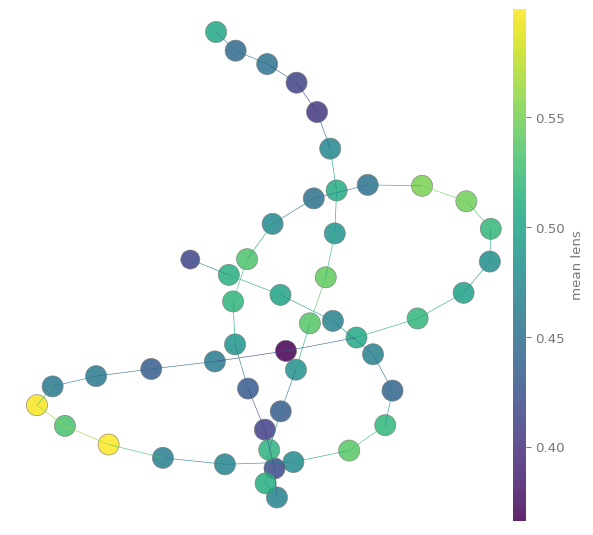

In [3]:
%matplotlib inline
mp.plot('matplotlib', 512, 512, 'mean lens')
plt.show()